In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [92]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## Missing Values

In [93]:
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

## Scaling


#### Plotting all columns to see if anybody has the gaussian distribution

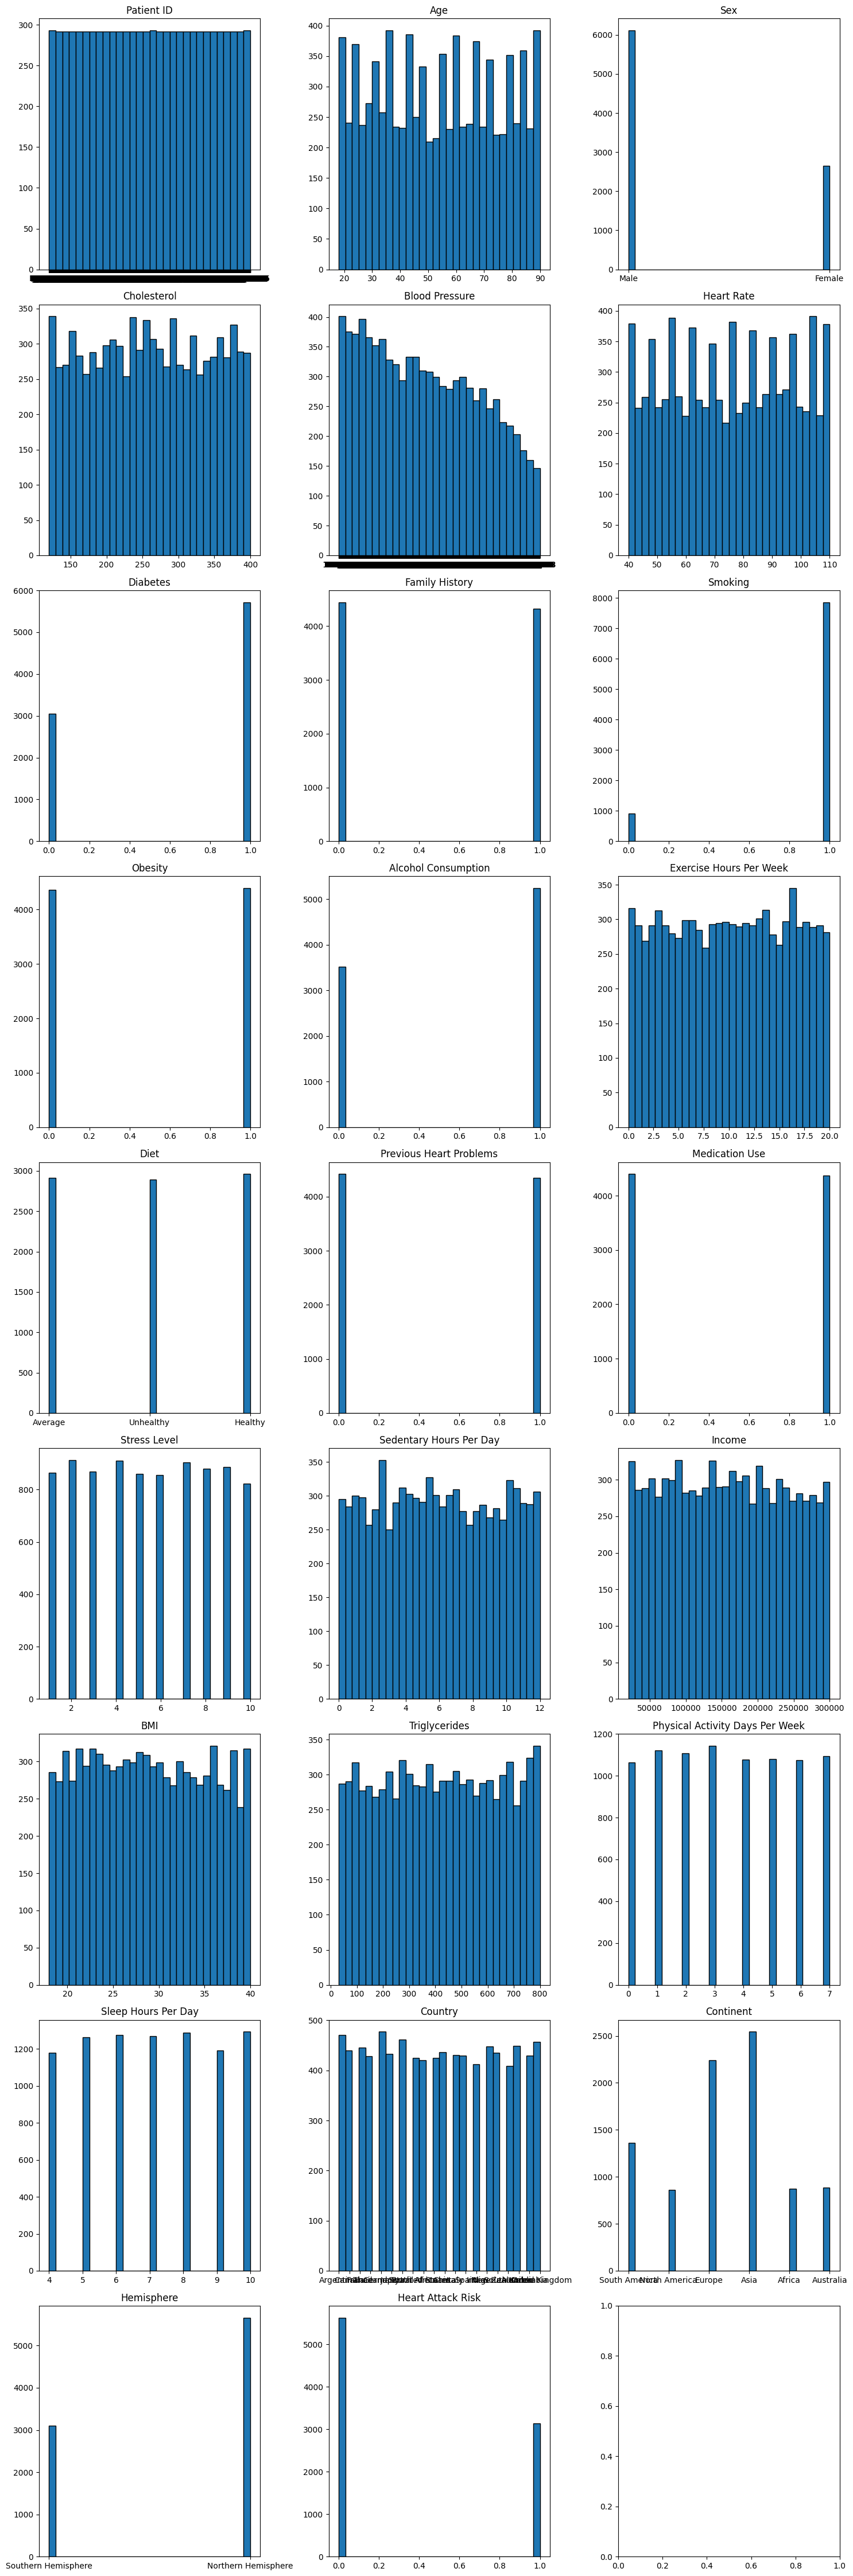

In [94]:
columns = df.shape[1]
rows = (columns // 3) + (columns % 3 > 0)
cols = min(columns, 3)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 5))
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(df.columns):
    axes[i].hist(df[column].dropna(), bins=30, edgecolor='k')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

#### Patient ID is not necessary to the data

In [95]:
df = df.drop(columns = ['Patient ID'], axis = 1)

#### All the columns with numerical values are not normally distributed so we will apply MinMax normalization

In [96]:
scaler = MinMaxScaler(feature_range=(-1, 1))
columns = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']

In [97]:
df[columns] = scaler.fit_transform(df[columns])

In [98]:
df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,0.361111,Male,-0.371429,158/88,-0.085714,0,0,1,0,0,...,0.102469,0.724537,0.204726,-0.335065,-1.000000,-0.333333,Argentina,South America,Southern Hemisphere,0
1,-0.916667,Male,0.921429,165/93,0.657143,1,1,1,1,1,...,-0.172833,0.898632,-0.164111,-0.467532,-0.714286,0.000000,Canada,North America,Northern Hemisphere,0
2,-0.916667,Female,0.457143,174/99,-0.085714,1,0,0,0,0,...,0.577283,0.537879,-0.074854,0.446753,0.142857,-1.000000,France,Europe,Northern Hemisphere,0
3,0.833333,Male,0.878571,163/100,-0.057143,1,1,1,0,1,...,0.274827,-0.245580,0.678788,-0.096104,-0.142857,-1.000000,Canada,North America,Northern Hemisphere,0
4,0.333333,Male,0.414286,91/88,0.514286,1,1,1,1,0,...,-0.747699,0.003909,-0.653846,-0.477922,-0.714286,-0.666667,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.166667,Male,-0.992857,94/76,-0.400000,1,1,1,0,1,...,0.801144,0.538865,-0.849642,-0.903896,1.000000,0.000000,Thailand,Asia,Northern Hemisphere,0
8759,-0.722222,Female,-1.000000,157/102,-0.057143,1,0,0,1,0,...,-0.361267,0.413538,-0.455189,0.524675,0.142857,0.666667,Canada,North America,Northern Hemisphere,0
8760,-0.194444,Male,-0.071429,161/75,0.857143,0,1,1,1,1,...,-0.604277,-0.878982,0.582533,0.290909,0.142857,-1.000000,Brazil,South America,Southern Hemisphere,1
8761,-0.500000,Male,-0.585714,119/67,-0.428571,1,0,1,0,0,...,-0.995359,0.356816,-0.155105,-0.781818,-0.428571,0.333333,Brazil,South America,Southern Hemisphere,0


## Encoding

### Ordinal/Label Encoding

In [99]:
columns = ['Sex', 'Hemisphere', 'Diet'] # Diet column has values Unhealthy, Average, Healthy so makes sense to encode them in order 0, 1, 2
encoder = LabelEncoder()
for column in columns:
    df[column] = encoder.fit_transform(df[column])

In [100]:
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,0.361111,1,-0.371429,158/88,-0.085714,0,0,1,0,0,...,0.102469,0.724537,0.204726,-0.335065,-1.000000,-0.333333,Argentina,South America,1,0
1,-0.916667,1,0.921429,165/93,0.657143,1,1,1,1,1,...,-0.172833,0.898632,-0.164111,-0.467532,-0.714286,0.000000,Canada,North America,0,0
2,-0.916667,0,0.457143,174/99,-0.085714,1,0,0,0,0,...,0.577283,0.537879,-0.074854,0.446753,0.142857,-1.000000,France,Europe,0,0
3,0.833333,1,0.878571,163/100,-0.057143,1,1,1,0,1,...,0.274827,-0.245580,0.678788,-0.096104,-0.142857,-1.000000,Canada,North America,0,0
4,0.333333,1,0.414286,91/88,0.514286,1,1,1,1,0,...,-0.747699,0.003909,-0.653846,-0.477922,-0.714286,-0.666667,Thailand,Asia,0,0


In [101]:
print(df['Continent'].unique())
print(df['Country'].unique())

['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']
['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam' 'China' 'Italy' 'Spain' 'India'
 'Nigeria' 'New Zealand' 'South Korea' 'Australia' 'Colombia'
 'United Kingdom']


### One Hot Encoding

In [102]:
# Since there are not too many unique values for Country and Continent we can one hot encode them
columns = ['Country', 'Continent']
encoder = OneHotEncoder(sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[columns]))
df_encoded.columns = encoder.get_feature_names_out(columns)

df = pd.concat([df, df_encoded], axis=1).drop(columns, axis=1)

In [103]:
df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,0.361111,1,-0.371429,158/88,-0.085714,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.916667,1,0.921429,165/93,0.657143,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.916667,0,0.457143,174/99,-0.085714,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.833333,1,0.878571,163/100,-0.057143,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.333333,1,0.414286,91/88,0.514286,1,1,1,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.166667,1,-0.992857,94/76,-0.400000,1,1,1,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8759,-0.722222,0,-1.000000,157/102,-0.057143,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8760,-0.194444,1,-0.071429,161/75,0.857143,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8761,-0.500000,1,-0.585714,119/67,-0.428571,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Again Poltting all Graphs to check if everthing workerd

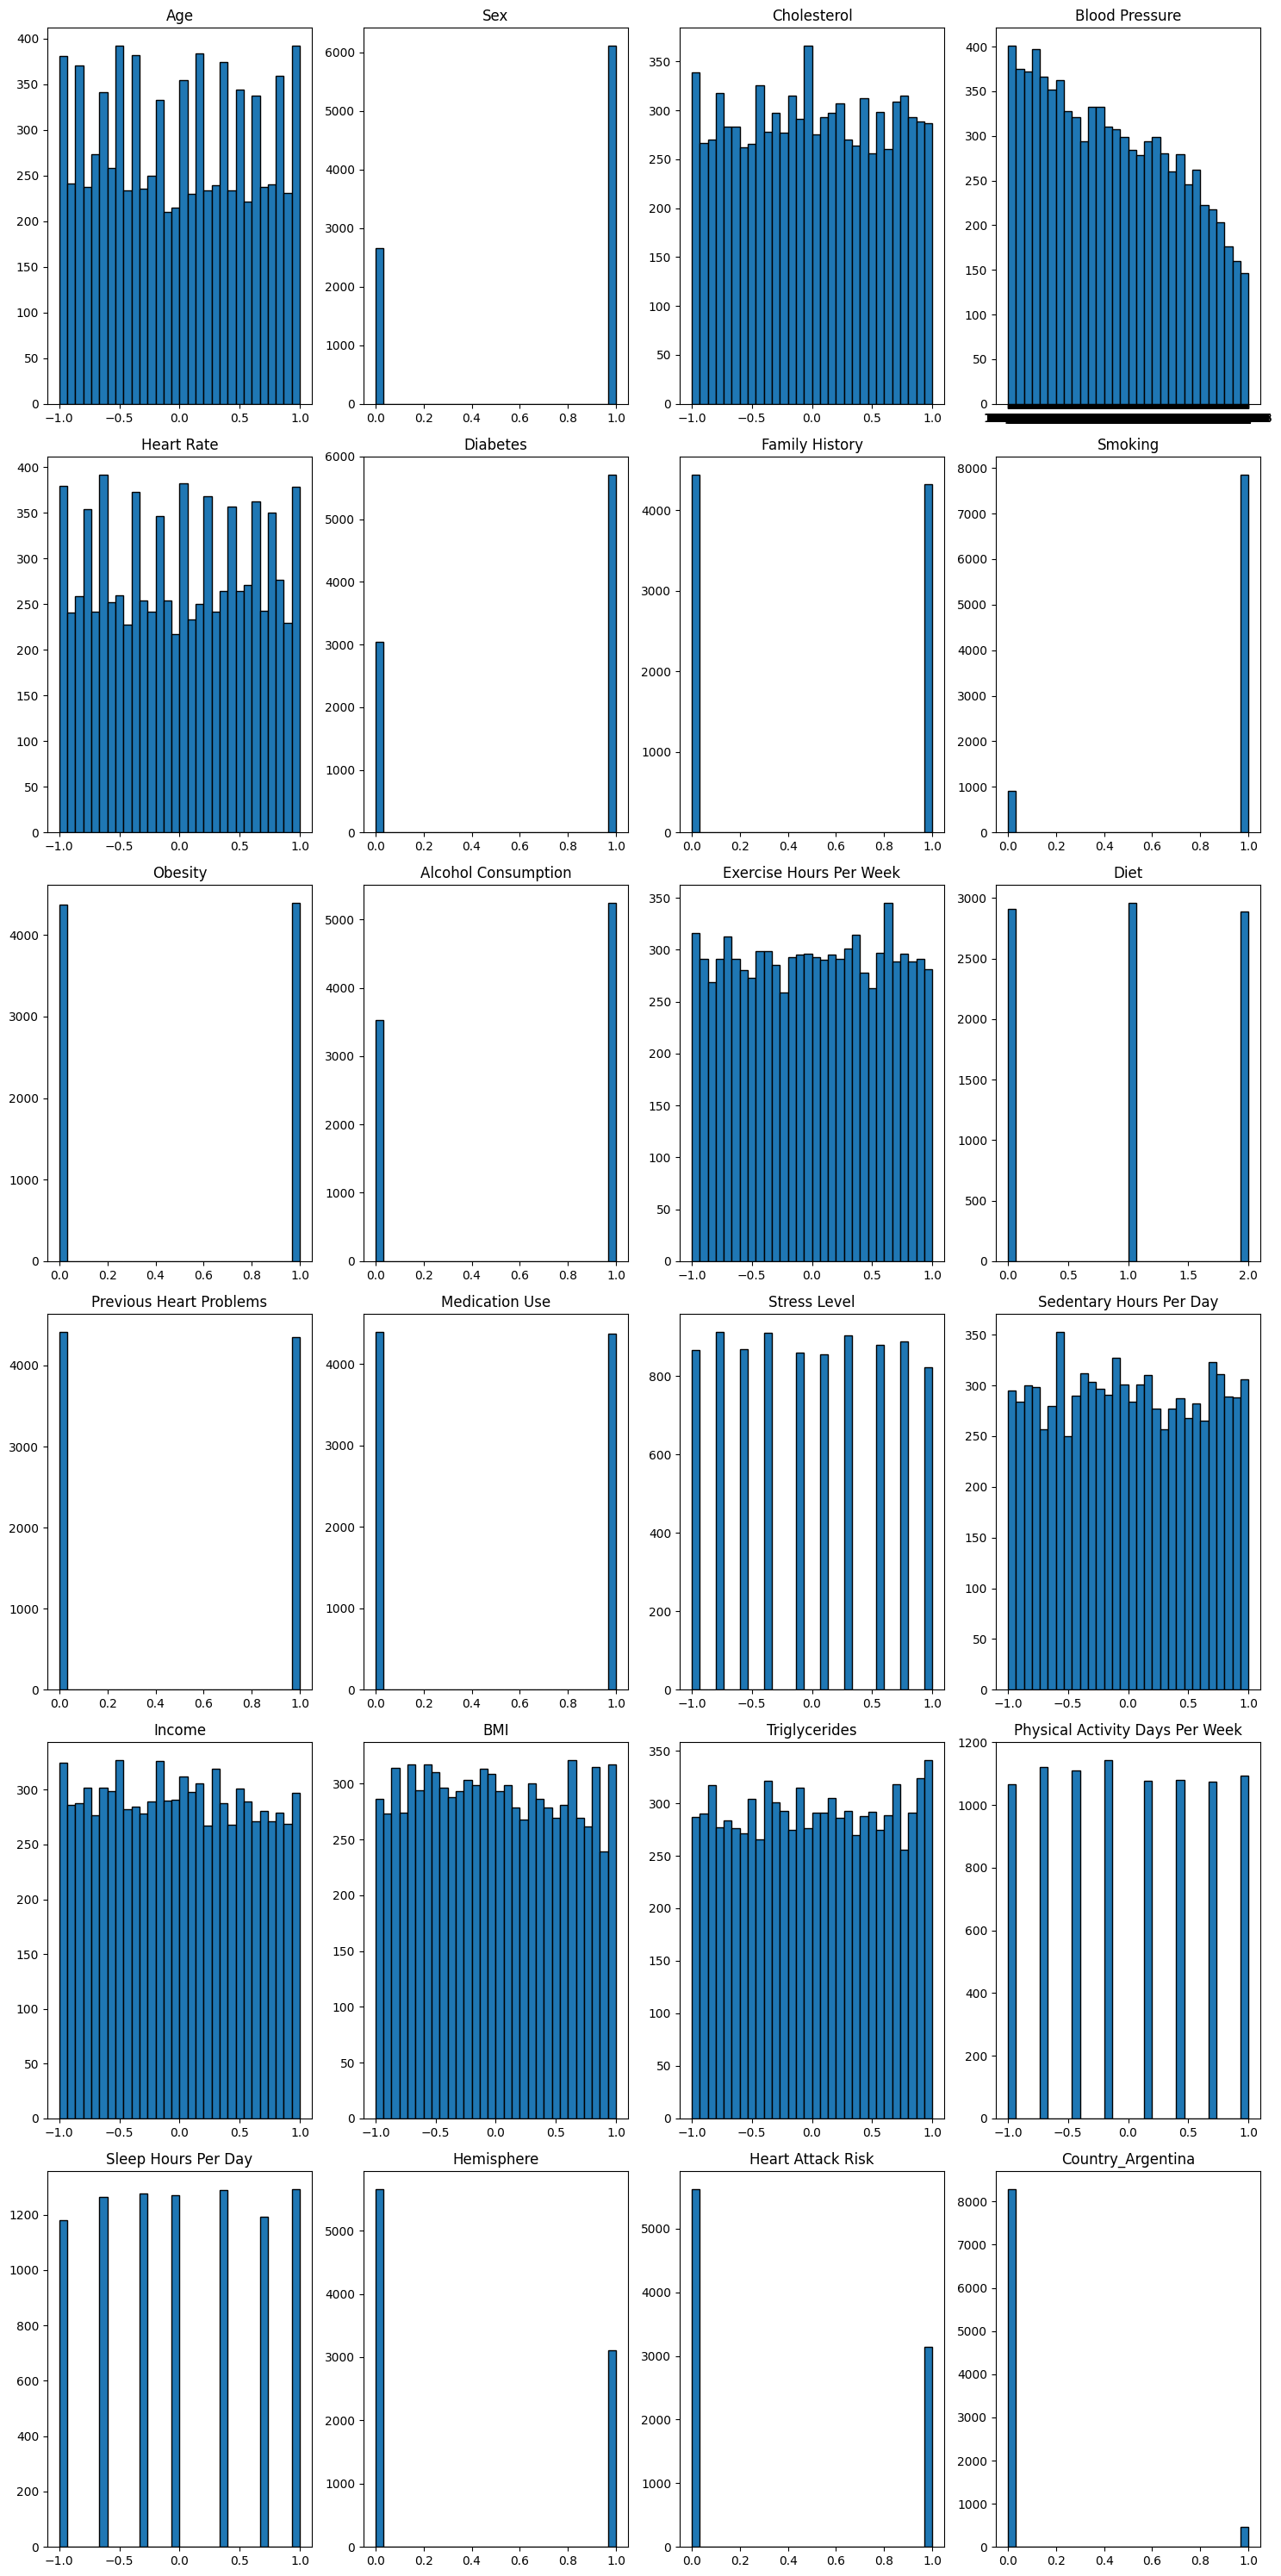

In [104]:
columns = 24
rows = (columns // 4) + (columns % 4 > 0)
cols = min(columns, 4)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 5))
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(df.columns):
    if(i >= columns):
        break
    axes[i].hist(df[column].dropna(), bins=30, edgecolor='k')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## Feature Creation

In [105]:
# The blood pressure can be split into 2 columns Upper and Lower blood pressure
df[['Upper Blood Pressure', 'Lower Blood Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
df['Upper Blood Pressure'] = pd.to_numeric(df['Upper Blood Pressure'])
df['Lower Blood Pressure'] = pd.to_numeric(df['Lower Blood Pressure'])
df = df.drop(columns=['Blood Pressure'])
df.insert(4, 'Upper Blood Pressure', df.pop('Upper Blood Pressure'))
df.insert(5, 'Lower Blood Pressure', df.pop('Lower Blood Pressure'))

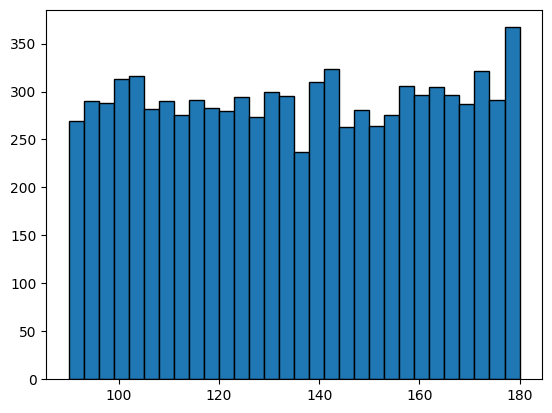

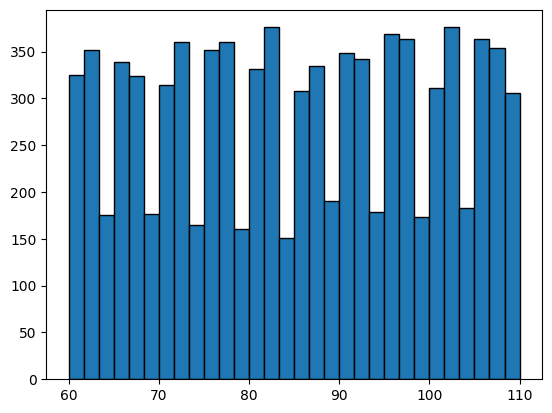

In [106]:
plt.hist(df['Upper Blood Pressure'], bins = 30, edgecolor = 'k')
plt.show()
plt.hist(df['Lower Blood Pressure'], bins = 30, edgecolor = 'k')
plt.show()

In [107]:
# Again both these are not gaussian so same Min Max scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
columns = ['Upper Blood Pressure', 'Lower Blood Pressure']
df[columns] = scaler.fit_transform(df[columns])

In [108]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Upper Blood Pressure,Lower Blood Pressure,Diabetes,Family History,Smoking,Obesity,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,0.361111,1,-0.371429,-0.085714,0.511111,0.12,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.916667,1,0.921429,0.657143,0.666667,0.32,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.916667,0,0.457143,-0.085714,0.866667,0.56,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.833333,1,0.878571,-0.057143,0.622222,0.60,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.333333,1,0.414286,0.514286,-0.977778,0.12,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Outlier Analysis

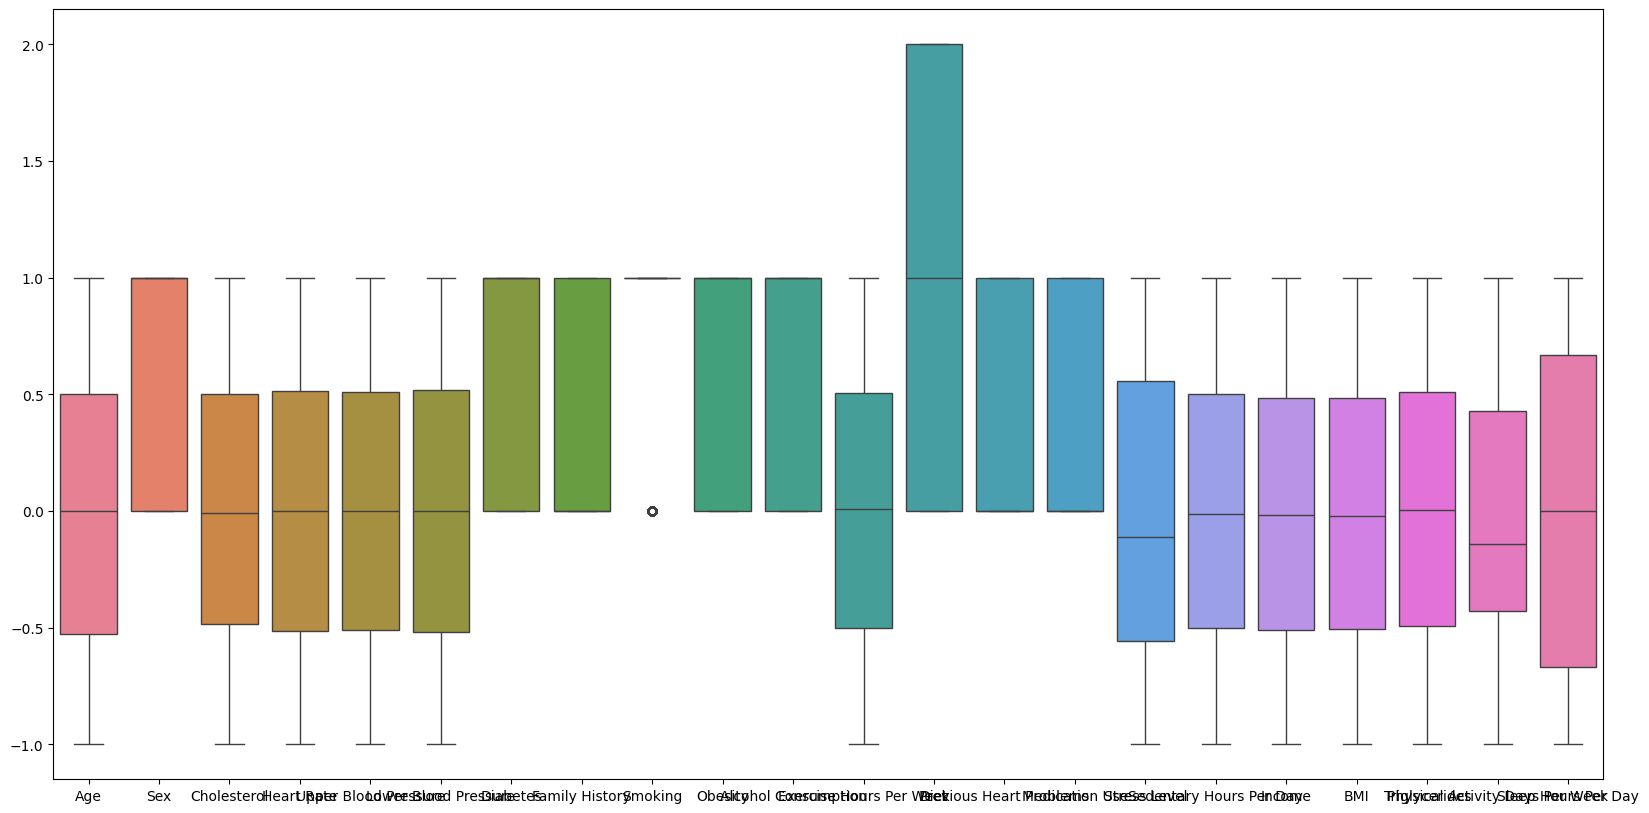

In [109]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.iloc[:, :22])
plt.show()

In [110]:
column_to_move = 'Heart Attack Risk'
df = df[[col for col in df.columns if col != column_to_move] + [column_to_move]]
m, n = df.shape
split = int(0.7 * m)
train = df[:split]
test = df[split:]
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)